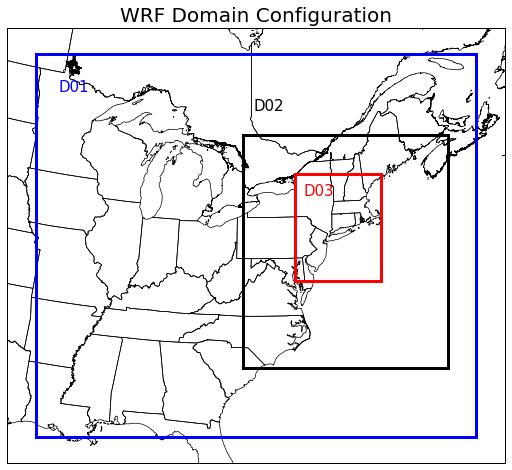

In [4]:
import os
os.environ["PROJ_LIB"] = "C:\\Users\\Mike\\Anaconda3\\Library\\share\\"; #fixr
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature, OCEAN, LAKES
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.font_manager import FontProperties
from matplotlib.colors import BoundaryNorm
from cartopy.io.shapereader import Reader
from matplotlib.axes import Axes
import shapely.geometry as sgeom
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
from cartopy import crs
from copy import copy
import netCDF4 as nc
import numpy as np
import pyproj
import time
import wrf
import time

import re  # regular expression
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh


start_time = time.time()
# Function to obtain projection and dx/dy limits----------------------------------------------------------------------------
def get_plot_element(infile):
    rootgroup = nc.Dataset(infile, 'r')
    p = wrf.getvar(rootgroup, 'RAINNC')
    #lats, lons = wrf.latlon_coords(p)
    cart_proj = wrf.get_cartopy(p)
    xlim = wrf.cartopy_xlim(p)
    ylim = wrf.cartopy_ylim(p)
    rootgroup.close()
    return cart_proj, xlim, ylim

#########################################################################################################
###Loading files
#########################################################################################################
# Add one wrf file for each domain----------------------------------------------------------------------------
infile_d01 = './domain_plot/wrfout_d01_2010-02-09_00_00_00'#+'.nc'
cart_proj, xlim_d01, ylim_d01 = get_plot_element(infile_d01)
 
infile_d02 = './domain_plot/wrfout_d02_2010-02-09_00_00_00'#+'.nc'
_, xlim_d02, ylim_d02 = get_plot_element(infile_d02)
 
infile_d03 = './domain_plot/wrfout_d03_2010-02-09_00_00_00'#+'.nc'
_, xlim_d03, ylim_d03 = get_plot_element(infile_d03)

fname_usa = 'C:/Users/Mike/Desktop/Graduate_Work/Evaluation_Procedure/NWP_Domains_shp/Boundaries_Shapefiles/United_States_States_5m/cb_2016_us_state_5m.shp'
fname_can = 'C:/Users/Mike/Desktop/Graduate_Work/Evaluation_Procedure/NWP_Domains_shp/Boundaries_Shapefiles/Canada_trsmd/canada_tr.shp'
#########################################################################################################
###Drawing the image
#########################################################################################################
### Create image/projection-------------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(10,8))    #image size
ax = plt.axes(projection=cart_proj) #projection from wrf
 
### Drawing cartopy resources-------------------------------------------------------------------------------------------------------
#states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
#                             name='admin_1_states_provinces_shp')
#ax.add_feature(states, linewidth=0.5)
#ax.coastlines('50m', linewidth=0.8)
 
### Drawing bound via d01-------------------------------------------------------------------------------------------------------
# d01
ax.set_xlim([xlim_d01[0]-(xlim_d01[1]-xlim_d01[0])/15, xlim_d01[1]+(xlim_d01[1]-xlim_d01[0])/15])
ax.set_ylim([ylim_d01[0]-(ylim_d01[1]-ylim_d01[0])/15, ylim_d01[1]+(ylim_d01[1]-ylim_d01[0])/15])
 
### Drawing domains colorbar-------------------------------------------------------------------------------------------------------

# d01 box [parent domain]
ax.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), xlim_d01[1]-xlim_d01[0], ylim_d01[1]-ylim_d01[0],
             fill=None, lw=3, edgecolor='blue', zorder=10))
ax.text(xlim_d01[0]+(xlim_d01[1]-xlim_d01[0])*0.05, ylim_d01[0]+(ylim_d01[1]-ylim_d01[0])*0.9, 'D01',
        size=15, color='blue', zorder=10)
 
#*****************************************************************************
# If only d01, comment out d02 and d03 (...)
#*****************************************************************************

# d02 box [if available]
ax.add_patch(mpl.patches.Rectangle((xlim_d02[0], ylim_d02[0]), xlim_d02[1]-xlim_d02[0], ylim_d02[1]-ylim_d02[0],
             fill=None, lw=3, edgecolor='black', zorder=10))
ax.text(xlim_d02[0]+(xlim_d02[1]-xlim_d02[0])*0.05, ylim_d02[0]+(ylim_d02[1]-ylim_d02[0])*1.1, 'D02',
        size=15, color='black', zorder=10)
 
# d03 box [if available] 
ax.add_patch(mpl.patches.Rectangle((xlim_d03[0], ylim_d03[0]), xlim_d03[1]-xlim_d03[0], ylim_d03[1]-ylim_d03[0],
             fill=None, lw=3, edgecolor='red', zorder=10))
ax.text(xlim_d03[0]+(xlim_d03[1]-xlim_d03[0])*0.1, ylim_d03[0]+(ylim_d03[1]-ylim_d03[0])*0.8, 'D03',
        size=15, color='red', zorder=10)

#*****************************************************************************
# *********************d04 box [if available... MUST ADD]*********************
#*****************************************************************************

ax.add_geometries(Reader(fname_usa).geometries(), ccrs.PlateCarree(), facecolor="none", edgecolor='black', lw=0.7)
ax.add_geometries(Reader(fname_can).geometries(), ccrs.PlateCarree(), facecolor="none", edgecolor='black', lw=0.7)
#ax.add_geometries(Reader(fname_chm).geometries(), ccrs.PlateCarree(), facecolor="none", edgecolor='black', lw=0.7)
ax.set_title('WRF Domain Configuration', size=20)
### Saving image-------------------------------------------------------------------------------------------------------
plt.show()
fig.savefig('WRF_domain_wrfout.png', dpi=600)
fig.savefig('WRF_domain_wrfout.png', dpi=600)
pp = PdfPages('WRF_domain_wrfout.pdf')
pp.savefig(fig)
pp.close()
print("--- %s seconds ---" % (time.time() - start_time))

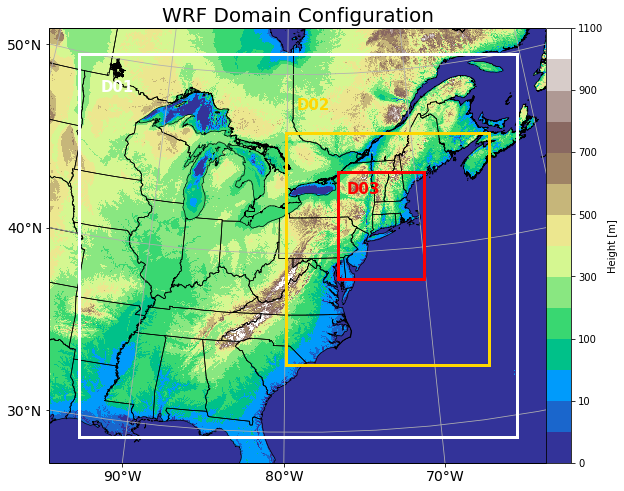

In [3]:
start_time = time.time(
ETOP_PATH = './domain_plot/exportImage.nc'
WPS_PATH  = './domain_plot/namelist.wps'

#%matplotlib inline
###########################################################################################################################
###Create functions
###########################################################################################################################
#--------------------------------------------------------------------------------------------------------------------------
def make_colorbar(ax, mappable, **kwargs):
    divider = make_axes_locatable(ax)
    orientation = kwargs.pop('orientation', 'vertical')
    if orientation == 'vertical':
        loc = 'right'
    elif orientation == 'horizontal':
        loc = 'bottom'
    cax = divider.append_axes(loc, '5%', pad='0%', axes_class=mpl.pyplot.Axes)
    ax.get_figure().colorbar(mappable, cax=cax,label="Height [m]", orientation=orientation)
#--------------------------------------------------------------------------------------------------------------------------
def get_wps_param_value(wps_file, param_name, noutput, vartype):
    with open(wps_file, 'r') as file:
        for line in file.readlines():
            words = re.split('=|\s+|,|\'', line)
            while '' in words:
                words.remove('')
            if param_name in words:
                if noutput==1:
                    if vartype=='float':
                        output = float(words[1])
                    elif vartype=='int':
                        output = int(words[1])
                    else:
                        output = words[1]
                if noutput>1:
                    if vartype=='float':
                        output = np.ones((noutput,1))*1.1
                        for i in np.arange(noutput):
                            output[i] = float(words[1+i])
                    elif vartype=='int':
                        output = np.ones((noutput,1))
                        for i in np.arange(noutput):
                            output[i] = int(words[1+i])
                    else:
                        output = words[1:(1+noutput)]
                    
    return output
#--------------------------------------------------------------------------------------------------------------------------
def get_proj_lcc(wps_file):
    ref_lat = get_wps_param_value(wps_file, 'ref_lat', 1, 'float')
    ref_lon = get_wps_param_value(wps_file, 'ref_lon', 1, 'float')
    par_lat1 = get_wps_param_value(wps_file, 'truelat1', 1, 'float')
    par_lat2 = get_wps_param_value(wps_file, 'truelat2', 1, 'float')
    standard_lon = get_wps_param_value(wps_file, 'stand_lon', 1, 'float')
    
    lccproj = ccrs.LambertConformal(central_longitude=ref_lon, central_latitude=ref_lat,
                                    standard_parallels=(par_lat1, par_lat2), globe=None, cutoff=10)
    return lccproj
#--------------------------------------------------------------------------------------------------------------------------
def calc_corner_point_latlon(center_lat, center_lon, e_we, e_ns, dx, dy, wpsproj, latlonproj, loc):
    center_x, center_y = wpsproj.transform_point(center_lon, center_lat, latlonproj)
    if loc=='ll':
        xpt = center_x - dx*e_we/2.0
        ypt = center_y - dy*e_ns/2.0
    elif loc=='lr':
        xpt = center_x + dx*e_we/2.0
        ypt = center_y - dy*e_ns/2.0
    elif loc=='ul':
        xpt = center_x - dx*e_we/2.0
        ypt = center_y + dy*e_ns/2.0
    elif loc=='ur':
        xpt = center_x + dx*e_we/2.0
        ypt = center_y + dy*e_ns/2.0
    corner_lon, corner_lat = latlonproj.transform_point(xpt, ypt, wpsproj)
    
    return corner_lon, corner_lat
#--------------------------------------------------------------------------------------------------------------------------
def calc_center_point_latlon(corner_lat_parent, corner_lon_parent, dx_parent, dy_parent, e_we, e_ns, dx, dy, i, j, wpsproj, latlonproj):
    corner_x_parent, corner_y_parent = wpsproj.transform_point(corner_lon_parent, corner_lat_parent, latlonproj)
    center_x_child = corner_x_parent + dx_parent*i + dx*e_we/2.0
    center_y_child = corner_y_parent + dy_parent*j + dy*e_ns/2.0
    center_lon_child, center_lat_child = latlonproj.transform_point(center_x_child, center_y_child, wpsproj)
    
    return center_lon_child, center_lat_child
#--------------------------------------------------------------------------------------------------------------------------
def calc_wps_domain_info(wps_file):
    ndomain = get_wps_param_value(wps_file, 'max_dom', 1, 'int')
    proj_name = get_wps_param_value(wps_file, 'map_proj', 1, '')

    grid_ratios = get_wps_param_value(wps_file, 'parent_grid_ratio', ndomain, 'int')
    i_parent_start_array = get_wps_param_value(wps_file, 'i_parent_start', ndomain, 'int')
    j_parent_start_array = get_wps_param_value(wps_file, 'j_parent_start', ndomain, 'int')
    e_we_array = get_wps_param_value(wps_file, 'e_we', ndomain, 'int')
    e_ns_array = get_wps_param_value(wps_file, 'e_sn', ndomain, 'int')
    dx_d01 = get_wps_param_value(wps_file, 'dx', 1, 'float')
    dy_d01 = get_wps_param_value(wps_file, 'dy', 1, 'float')
    cen_lat_d01 = get_wps_param_value(wps_file, 'ref_lat', 1, 'float')
    cen_lon_d01 = get_wps_param_value(wps_file, 'ref_lon', 1, 'float')
    
    center_lat_full = np.zeros((ndomain, 1))
    center_lon_full = np.zeros((ndomain, 1))
    half_size_ns_full = np.zeros((ndomain, 1))
    half_size_we_full = np.zeros((ndomain, 1))
    corner_lat_full = np.zeros((ndomain, 4)) # ll, lr, uf, ur
    corner_lon_full = np.zeros((ndomain, 4)) # ll, lr, uf, ur
    dx_full = np.zeros((ndomain, 1))
    dy_full = np.zeros((ndomain, 1))
    length_x = np.zeros((ndomain, 1))
    length_y = np.zeros((ndomain, 1))
       
    # get WPS projection info
    # LCC
    if proj_name=='lambert':
        wpsproj = get_proj_lcc(infile)
    
    # Geodetic, for lat/lon projection
    latlonproj = ccrs.Geodetic()
    
    # d01
    dx_full[0] = dx_d01
    dy_full[0] = dy_d01
    center_lat_full[0] = cen_lat_d01
    center_lon_full[0] = cen_lon_d01
    length_x[0] = dx_full[0]*e_we_array[0]
    length_y[0] = dy_full[0]*e_ns_array[0]
    if ndomain>1:
        e_we = int(e_we_array[0])
        e_ns = int(e_ns_array[0])
    else:
        e_we = e_we_array
        e_ns = e_ns_array
    corner_lon_full[0,0], corner_lat_full[0,0] = calc_corner_point_latlon(float(center_lat_full[0]), float(center_lon_full[0]),
                                                                          e_we, e_ns, 
                                                                          float(dx_full[0]), float(dy_full[0]),
                                                                          wpsproj, latlonproj, 'll')
    corner_lon_full[0,1], corner_lat_full[0,1] = calc_corner_point_latlon(center_lat_full[0], center_lon_full[0],
                                                                          e_we, e_ns,
                                                                          dx_full[0], dy_full[0],
                                                                          wpsproj, latlonproj, 'lr')
    corner_lon_full[0,2], corner_lat_full[0,2] = calc_corner_point_latlon(center_lat_full[0], center_lon_full[0],
                                                                          e_we, e_ns,
                                                                          dx_full[0], dy_full[0],
                                                                          wpsproj, latlonproj, 'ul')
    corner_lon_full[0,3], corner_lat_full[0,3] = calc_corner_point_latlon(center_lat_full[0], center_lon_full[0],
                                                                          e_we, e_ns, 
                                                                          dx_full[0], dy_full[0],
                                                                          wpsproj, latlonproj, 'ur')
    
    if ndomain>1:
        for i in np.arange(1,ndomain):
            dx_full[i] = dx_full[i-1]/float(grid_ratios[i])
            dy_full[i] = dy_full[i-1]/float(grid_ratios[i])
            length_x[i] = dx_full[i]*e_we_array[i]
            length_y[i] = dy_full[i]*e_ns_array[i]
            center_lon_full[i], center_lat_full[i] = calc_center_point_latlon(corner_lat_full[i-1,0], corner_lon_full[i-1,0],
                                                                              dx_full[i-1], dy_full[i-1],
                                                                              e_we_array[i], e_ns_array[i],
                                                                              dx_full[i], dy_full[i],
                                                                              i_parent_start_array[i], j_parent_start_array[i],
                                                                              wpsproj, latlonproj)
            corner_lon_full[i,0], corner_lat_full[i,0] = calc_corner_point_latlon(center_lat_full[i], center_lon_full[i],
                                                                              e_we_array[i], e_ns_array[i], 
                                                                              dx_full[i], dy_full[i],
                                                                              wpsproj, latlonproj, 'll')
            corner_lon_full[i,1], corner_lat_full[i,1] = calc_corner_point_latlon(center_lat_full[i], center_lon_full[i],
                                                                              e_we_array[i], e_ns_array[i], 
                                                                              dx_full[i], dy_full[i],
                                                                              wpsproj, latlonproj, 'lr')
            corner_lon_full[i,2], corner_lat_full[i,2] = calc_corner_point_latlon(center_lat_full[i], center_lon_full[i],
                                                                              e_we_array[i], e_ns_array[i], 
                                                                              dx_full[i], dy_full[i],
                                                                              wpsproj, latlonproj, 'ul')
            corner_lon_full[i,3], corner_lat_full[i,3] = calc_corner_point_latlon(center_lat_full[i], center_lon_full[i],
                                                                              e_we_array[i], e_ns_array[i], 
                                                                              dx_full[i], dy_full[i],
                                                                              wpsproj, latlonproj, 'ur')
    
    return wpsproj, latlonproj, corner_lat_full, corner_lon_full, length_x, length_y
#--------------------------------------------------------------------------------------------------------------------------
def reproject_corners(corner_lons, corner_lats, wpsproj, latlonproj):
    corner_x = np.zeros((4,1))
    corner_y = np.zeros((4,1))
    corner_x[0], corner_y[0] = wpsproj.transform_point(corner_lons[0], corner_lats[0], latlonproj)
    corner_x[1], corner_y[1] = wpsproj.transform_point(corner_lons[1], corner_lats[1], latlonproj)
    corner_x[2], corner_y[2] = wpsproj.transform_point(corner_lons[2], corner_lats[2], latlonproj)
    corner_x[3], corner_y[3] = wpsproj.transform_point(corner_lons[3], corner_lats[3], latlonproj)

    return corner_x, corner_y
#--------------------------------------------------------------------------------------------------------------------------
def find_side(ls, side):
    """
    Given a shapely LineString which is assumed to be rectangular, return the
    line corresponding to a given side of the rectangle.
    
    """
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])
#--------------------------------------------------------------------------------------------------------------------------
def lambert_xticks(ax, ticks, size):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels], size=size)
#--------------------------------------------------------------------------------------------------------------------------
def lambert_yticks_left(ax, ticks, size):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels], size=size)
#--------------------------------------------------------------------------------------------------------------------------
def lambert_yticks_right(ax, ticks, size):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'right', lc, te)
    ax.yaxis.tick_right()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels], size=size)
#--------------------------------------------------------------------------------------------------------------------------
def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:    
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels
###########################################################################################################################
###Load DEM
###########################################################################################################################
etopo1file = ETOP_PATH
rootgroup = nc.Dataset(etopo1file, 'r', format='NETCDF4')
dem = rootgroup.variables['Band1'][:][:]
dem_lat = rootgroup.variables['lat'][:]
dem_lon = rootgroup.variables['lon'][:]
rootgroup.close()
dem_lons, dem_lats = np.meshgrid(dem_lon, dem_lat)
#for i in np.arange(dem.shape[0]):
#    for j in np.arange(dem.shape[1]):
#        if dem[i,j]<0:
#            dem[i,j]=0
###########################################################################################################################
###Begin Plotting
###########################################################################################################################
infile = WPS_PATH
wpsproj, latlonproj, corner_lat_full, corner_lon_full, length_x, length_y = calc_wps_domain_info(infile)
#fix negative values... chnage to sea-evel
dem[dem<0] = 0
#Defines shaded topography height information
levs = np.arange(100,1200,100)
levs = np.append([0,1,10,50],levs)
#Defines shaded topography color scheme
cmap = plt.get_cmap('terrain')
norm = BoundaryNorm(levs, ncolors=cmap.N, clip=True)
#--------------------------------------------------------------------------------------------------------------------------

fig1 = plt.figure(figsize=(10,8))
ax1 = plt.axes(projection=wpsproj)
cme = plt.pcolormesh(dem_lons, dem_lats, dem, norm=norm, cmap='terrain', vmin=0, vmax=3000, alpha=1, transform=ccrs.PlateCarree())

#ax1.coastlines('50m', linewidth=0.8)
#ax1.add_feature(OCEAN, edgecolor='k')#, facecolor='deepskyblue')
#ax1.add_feature(LAKES, edgecolor='k')#, facecolor='deepskyblue')
#states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
#                             name='admin_1_states_provinces_shp')
#ax1.add_feature(states, linewidth=0.5)
font0 = FontProperties()
font0.set_weight('bold')
#--------------------------------------------------------------------------------------------------------------------------
# d01
corner_x1, corner_y1 = reproject_corners(corner_lon_full[0,:], corner_lat_full[0,:], wpsproj, latlonproj)
ax1.set_xlim([corner_x1[0]-length_x[0]/15, corner_x1[3]+length_x[0]/15])
ax1.set_ylim([corner_y1[0]-length_y[0]/15, corner_y1[3]+length_y[0]/15])

# d01 box
ax1.add_patch(mpl.patches.Rectangle((corner_x1[0], corner_y1[0]),  length_x[0], length_y[0], 
                                    fill=None, lw=3, edgecolor='white', zorder=10))
ax1.text(corner_x1[0]+length_x[0]*0.05, corner_y1[0]+length_y[0]*0.9, 'D01',
         fontproperties=font0, size=15, color='white', zorder=10)

#*****************************************************************************
# If only d01, comment out d02 and d03 (...)
#*****************************************************************************

# d02 box
corner_x2, corner_y2 = reproject_corners(corner_lon_full[1,:], corner_lat_full[1,:], wpsproj, latlonproj)
ax1.add_patch(mpl.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], 
                                    fill=None, lw=3, edgecolor='gold', zorder=10))
ax1.text(corner_x2[0]+length_x[1]*0.05, corner_y2[0]+length_y[1]*1.1, 'D02',
         fontproperties=font0, size=15, color='gold', zorder=10)

# d03 box
corner_x3, corner_y3 = reproject_corners(corner_lon_full[2,:], corner_lat_full[2,:], wpsproj, latlonproj)
ax1.add_patch(mpl.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],
                                    fill=None, lw=3, edgecolor='red', zorder=10))
ax1.text(corner_x3[0]+length_x[2]*0.1, corner_y3[0]+length_y[2]*0.8, 'D03',
         fontproperties=font0, size=15, color='red', zorder=10)
    
#*****************************************************************************
# *********************d04 box [if available... MUST ADD]*********************
#*****************************************************************************
    
#--------------------------------------------------------------------------------------------------------------------------
ax1.add_geometries(Reader(fname_usa).geometries(), ccrs.PlateCarree(), facecolor="none", edgecolor='black', lw=0.7)
ax1.add_geometries(Reader(fname_can).geometries(), ccrs.PlateCarree(), facecolor="none", edgecolor='black', lw=0.7)
#--------------------------------------------------------------------------------------------------------------------------
fig1.canvas.draw()
xticks = [-150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50]
yticks = [10, 20, 30, 40, 50, 60, 70]
ax1.gridlines(xlocs=xticks, ylocs=yticks)
ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax1, xticks, 14)
lambert_yticks_left(ax1, yticks, 14)
#--------------------------------------------------------------------------------------------------------------------------
ax1.set_title('WRF Domain Configuration', size=20)
#--------------------------------------------------------------------------------------------------------------------------
cb1 = make_colorbar(ax1, cme)
cb1
#--------------------------------------------------------------------------------------------------------------------------
plt.show()
fig1.savefig('WRF_domain_wps.png', dpi=600)
pp = PdfPages('WRF_domain_wps.pdf')
pp.savefig(fig1)
pp.close()
print("--- %s seconds ---" % (time.time() - start_time))